In [23]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, math, random

In [24]:
np.set_printoptions(linewidth=400)

In [25]:
data = pd.read_table('qws2.CSV', header=None, delimiter=',')

pd_data = data.iloc[:, 0:9]
type(pd_data)

pandas.core.frame.DataFrame

In [26]:
item_size = pd_data.shape[0]-1

feature_dimension = pd_data.shape[1]

max_length = 10

epsilon = 1E-10

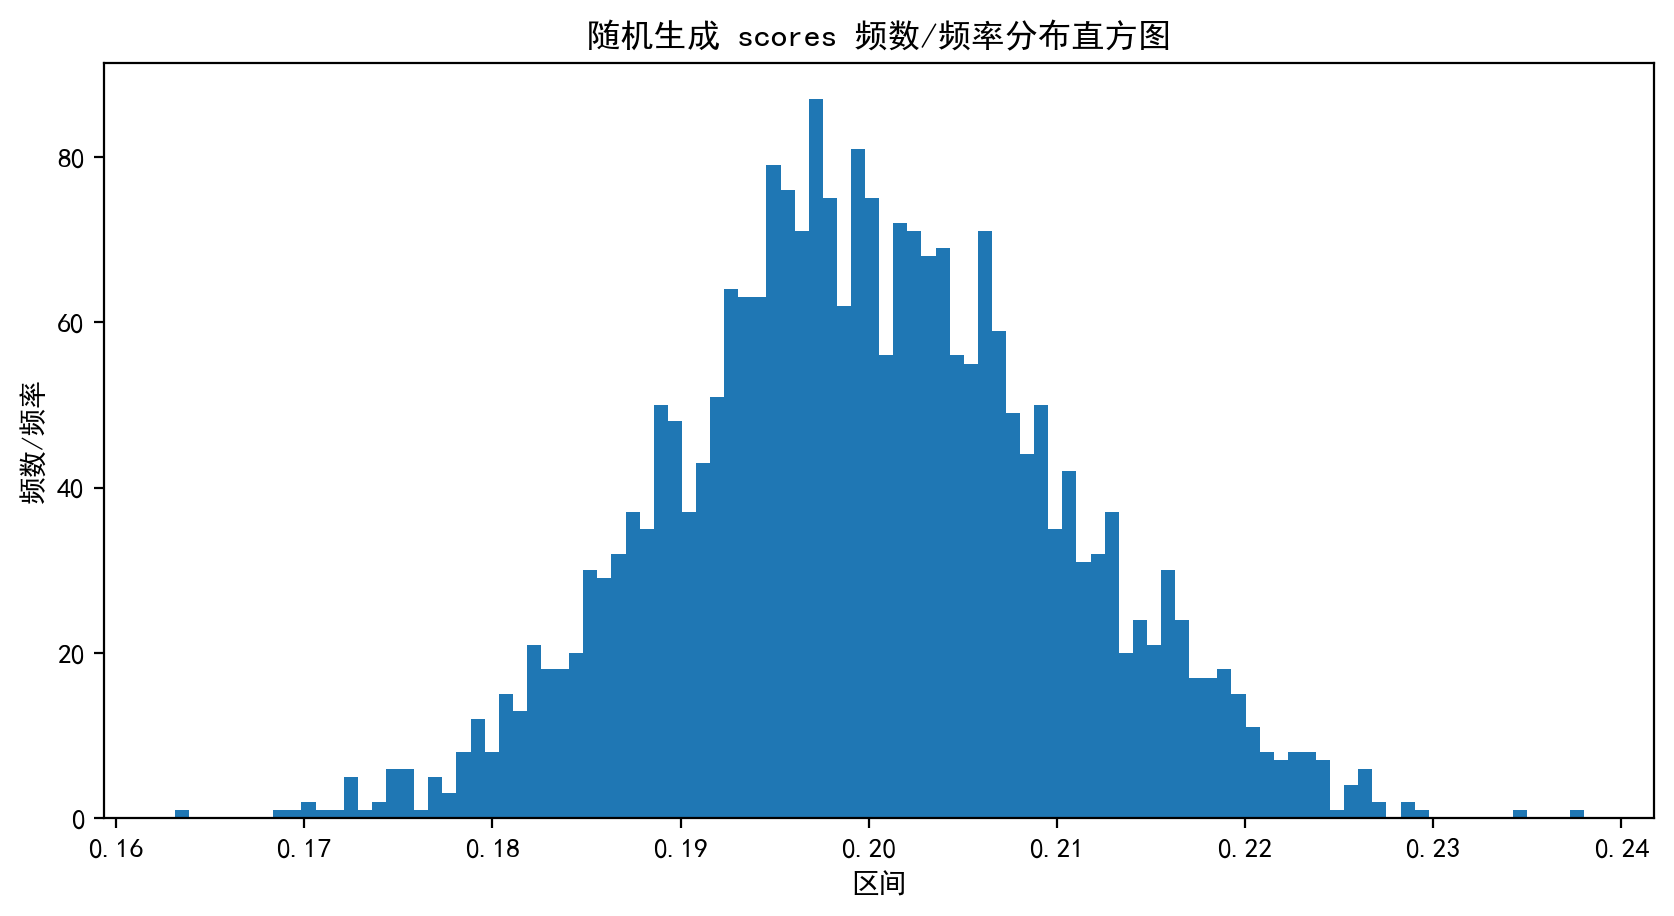

In [49]:
# item_data_x = np.linspace(-100,100,1000)
# item_data_y = np
# 0.01 * np.random.randn(item_size) + 0.2
a = 0.01 * np.random.randn(item_size) + 0.2 
plt.figure(figsize=(10,5), dpi=200)
plt.hist(a,100)# 画直方图
plt.xlabel("区间")
plt.ylabel("频数/频率")
plt.title("随机生成 scores 频数/频率分布直方图")
plt.show()

In [28]:
scores = np.exp(0.01 * np.random.randn(item_size) + 0.2) #mu=0.2, sigma=0.01 的正态分布
print('scores:', scores)

scores: [1.22898994 1.19651145 1.20466506 ... 1.20802739 1.20295929 1.22413433]


In [29]:
feature_vectors = pd_data.loc[1:,:].values.astype(float)

print(type(feature_vectors))
print(feature_vectors)

<class 'numpy.ndarray'>
[[3.0275e+02 8.9000e+01 7.1000e+00 ... 8.0000e+01 1.8775e+02 3.2000e+01]
 [4.8200e+02 8.5000e+01 1.6000e+01 ... 8.4000e+01 1.0000e+00 2.0000e+00]
 [3.3214e+03 8.9000e+01 1.4000e+00 ... 8.0000e+01 2.6000e+00 9.6000e+01]
 ...
 [9.3930e+01 8.0000e+01 2.1000e+00 ... 8.2000e+01 3.7200e+00 6.0000e+01]
 [1.0675e+02 8.6000e+01 1.3000e+00 ... 8.7000e+01 1.2500e+00 9.6000e+01]
 [3.1650e+02 7.2000e+01 1.5900e+01 ... 8.7000e+01 5.5000e+00 8.0000e+00]]


In [43]:
feature_vectors = feature_vectors / np.linalg.norm(feature_vectors, axis=1, keepdims=True)
print('l2_norm_feature_vectors:', feature_vectors, sep='\n')

similarities = np.dot(feature_vectors, feature_vectors.T)
print('similarities:', similarities, sep='\n')

kernel_matrix = scores.reshape((item_size, 1)) * similarities * scores.reshape((1, item_size))
print('reshaeped score:', scores.reshape((item_size, 1)) * scores.reshape((1, item_size)), sep='\n')
print('kernel_matrix:', kernel_matrix, sep='\n')

cis = np.zeros((max_length, item_size))
di2s = np.copy(np.diag(kernel_matrix))
selected_items = list()
selected_item = np.argmax(di2s)
selected_items.append(selected_item)

while len(selected_items) < max_length:
    k = len(selected_items) - 1
    ci_optimal = cis[:k, selected_item]
    di_optimal = math.sqrt(di2s[selected_item])
    elements = kernel_matrix[selected_item, :]
    eis = (elements - np.dot(ci_optimal, cis[:k, :])) / di_optimal
    cis[k, :] = eis
    di2s -= np.square(eis)
    di2s[selected_item] = -np.inf
    selected_item = np.argmax(di2s)
    if di2s[selected_item] < epsilon:
        break
    selected_items.append(selected_item)
    
print('scores:', scores)
print('selected_items_index:', selected_items)
print("selected_items_value:", scores[selected_items])


l2_norm_feature_vectors:
[[7.52615874e-01 2.21247937e-01 1.76501163e-02 ... 1.98874550e-01 4.66733709e-01 7.95498199e-02]
 [9.25520798e-01 1.63214249e-01 3.07226821e-02 ... 1.61294081e-01 1.92016763e-03 3.84033526e-03]
 [9.98003821e-01 2.67424399e-02 4.20667595e-04 ... 2.40381483e-02 7.81239819e-04 2.88457779e-02]
 ...
 [4.55423370e-01 3.87883207e-01 1.01819342e-02 ... 3.97580287e-01 1.80365691e-02 2.90912405e-01]
 [4.46778607e-01 3.59934053e-01 5.44086360e-03 ... 3.64119333e-01 5.23159961e-03 4.01786850e-01]
 [8.68583913e-01 1.97592549e-01 4.36350212e-02 ... 2.38757663e-01 1.50938753e-02 2.19547277e-02]]
similarities:
[[1.         0.86997638 0.77945642 ... 0.75845166 0.73581933 0.88588136]
 [0.86997638 1.         0.94487737 ... 0.73931327 0.71484563 0.98982433]
 [0.77945642 0.94487737 1.         ... 0.51003225 0.50232576 0.8947768 ]
 ...
 [0.75845166 0.73931327 0.51003225 ... 1.         0.9913373  0.81457884]
 [0.73581933 0.71484563 0.50232576 ... 0.9913373  1.         0.78706589]
 [0

In [31]:
# 产生十个用户，随机挑选5-15个item，作为服务调用历史记录
# 并选择其中的一个服务作为约束条件，也就是参考服务

In [32]:
class User:
    call_num = np.random.randint(5, 15 + 1) # [low, hight + 1)
    call_history = np.random.choice(item_size, call_num, replace=False) # 从item_size中随机挑选call_num个数，不重复
    representative_item_index = call_history[np.random.randint(0, call_num)] # 随机选择一个item作为参考服务
    representative_item = None
    def __init__(self):
        print(f'call_num: {self.call_num}')
        print(f'call_history: {self.call_history}')
        print(f'representative_item: {self.representative_item_index}')
    def set_representative_item(self, item_value):
        self.representative_item = item_value
    def __str__(self):
        return f'call_num: {self.call_num} \ncall_history: {self.call_history} \nrepresentative_item_index: {self.representative_item_index} \nrepresentative_item: {self.representative_item}'


In [33]:
user = User()

call_num: 10
call_history: [2444  798  472  250 1829  918  561   48   45 1489]
representative_item: 1489


In [34]:
user.set_representative_item(pd_data.iloc[user.representative_item_index].values.astype(float))

In [35]:
print(user)

call_num: 10 
call_history: [2444  798  472  250 1829  918  561   48   45 1489] 
representative_item_index: 1489 
representative_item: [95.  96.  28.3 99.  60.  89.  79.   1.  88. ]


In [36]:
similarities # (item_size, item_size)

array([[1.        , 0.86997638, 0.77945642, ..., 0.75845166, 0.73581933, 0.88588136],
       [0.86997638, 1.        , 0.94487737, ..., 0.73931327, 0.71484563, 0.98982433],
       [0.77945642, 0.94487737, 1.        , ..., 0.51003225, 0.50232576, 0.8947768 ],
       ...,
       [0.75845166, 0.73931327, 0.51003225, ..., 1.        , 0.9913373 , 0.81457884],
       [0.73581933, 0.71484563, 0.50232576, ..., 0.9913373 , 1.        , 0.78706589],
       [0.88588136, 0.98982433, 0.8947768 , ..., 0.81457884, 0.78706589, 1.        ]])

In [37]:
scores

array([1.22898994, 1.19651145, 1.20466506, ..., 1.20802739, 1.20295929, 1.22413433])

In [38]:
# 选择了一个参考服务，每个服务和参考服务的相似度就是该服务的分数
print(f"rep item index: {user.representative_item_index}")

rep item index: 1489


In [44]:
# 现在需要得到一个item——size维度的向量，表示每个服务与参考服务的相似度，作为得分
similarities_with_rep = similarities[user.representative_item_index]
similarities_with_rep[user.representative_item_index] # 参考服务与自身的相似度为1，丢失精度

1.0000000000000002

In [45]:
scores = np.exp(0.01 * similarities_with_rep + 0.2)
scores

array([1.2315568 , 1.23343083, 1.23355691, ..., 1.22882458, 1.2286229 , 1.23298439])

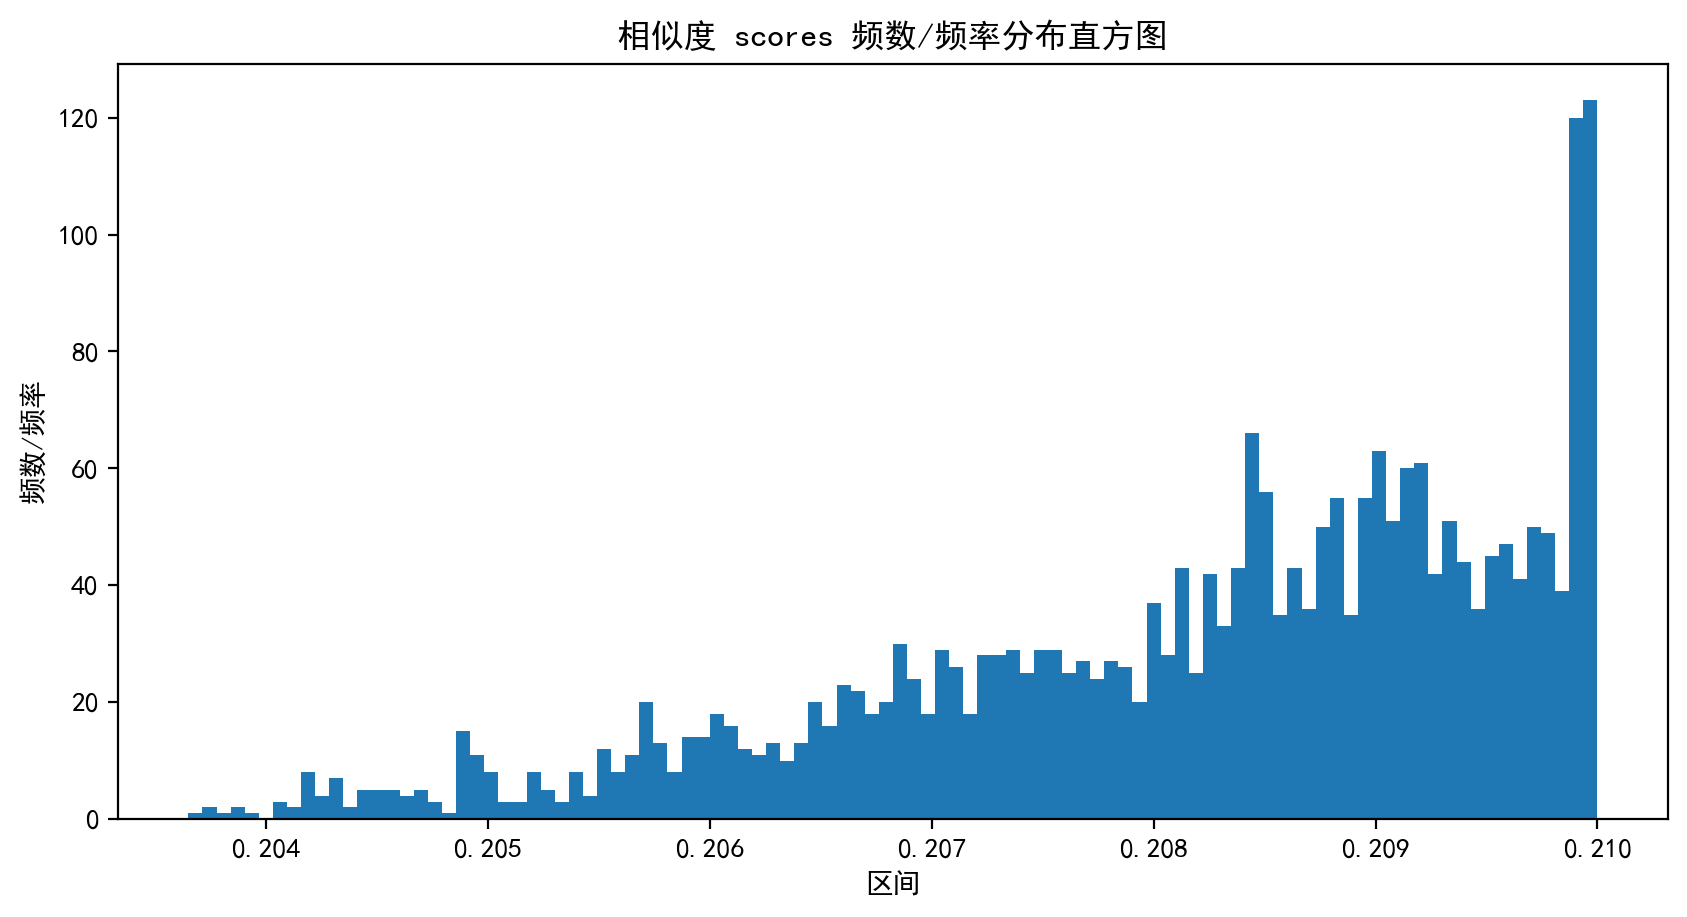

In [50]:
a = 0.01 * similarities_with_rep + 0.2
plt.figure(figsize=(10,5), dpi=200)
plt.hist(a,100)# 画直方图
plt.xlabel("区间")
plt.ylabel("频数/频率")
plt.title("相似度 scores 频数/频率分布直方图")
plt.show()